# WeatherPy
----

### Analysis
* As expected, the maximum temperature is highest near the equator and drops as you move further north or south. This temperature can be predicted using the equation y = -0.01x^2 + -0.18*x + 76.8. The Antarctic Circle begins at -60 degrees latitude, explaining the disparity between the cities in the northern vs southern hemisphere.
* Cloudiness does not appear to be dependent on latitude. However, we do see a small cluster of high % cloudiness between 45-50 degrees latitude. This could possibly indicate some sort of storm system or weather event.
* Humidity does not appear to be dependent on latitude.
* Wind speed does not appear to be dependent on latitude. The standard range of wind speeds appears to be between 0-10mph, with some cities experiencing up to 17mph.


In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key, weather_api_call

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [104]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
print(len(cities))

618


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [105]:
count=0
weather_dict={}
print("Beginning Data Retrieval")
print("------------------------------")
for idx, city in enumerate(cities):
    url="https://api.openweathermap.org/data/2.5/weather"
    query_url=f"{url}?{weather_api_call}{weather_api_key}&q={city},{countries[idx]}&units=imperial"
    response=requests.get(query_url).json()
    count += 1
    try:
        print(f'Processing Record {idx} of {len(cities)} | {response["name"]}, {response["sys"]["country"]}')
        weather_dict.setdefault("City",[]).append(response["name"])
        weather_dict.setdefault("Country",[]).append(response["sys"]["country"])
        weather_dict.setdefault("Date",[]).append(response["dt"])
        weather_dict.setdefault("Cloudiness",[]).append(response["clouds"]["all"])
        weather_dict.setdefault("Humidity",[]).append(response["main"]["humidity"])
        weather_dict.setdefault("Latitude",[]).append(response["coord"]["lat"])
        weather_dict.setdefault("Longitude",[]).append(response["coord"]["lon"])
        weather_dict.setdefault("Max Temp",[]).append(response["main"]["temp_max"])
        weather_dict.setdefault("Wind Speed",[]).append(response["wind"]["speed"])
    except KeyError:
        print(f'Record {idx} ({city}, {countries[idx]}) not found. Skipping...')
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 0 of 618 | Ushuaia, AR
Processing Record 1 of 618 | Avarua, CK
Processing Record 2 of 618 | La Suiza, CR
Processing Record 3 of 618 | Bredasdorp, ZA
Processing Record 4 of 618 | Tuktoyaktuk, CA
Processing Record 5 of 618 | Ust-Nera, RU
Processing Record 6 of 618 | Bathsheba, BB
Processing Record 7 of 618 | Pangnirtung, CA
Processing Record 8 of 618 | Vaini, TO
Processing Record 9 of 618 | Saint-Philippe, RE
Processing Record 10 of 618 | Mount Gambier, AU
Processing Record 11 of 618 | Sangmelima, CM
Processing Record 12 of 618 | Rikitea, PF
Processing Record 13 of 618 | Punta Arenas, CL
Processing Record 14 of 618 | Bluff, NZ
Processing Record 15 of 618 | Keskin, TR
Processing Record 16 of 618 | Port Elizabeth, ZA
Record 17 (barentsburg, sj) not found. Skipping...
Processing Record 18 of 618 | Castro, CL
Processing Record 19 of 618 | Bako, ET
Processing Record 20 of 618 | Cap Malheureux, MU
Processing Record 21 of

Processing Record 183 of 618 | Inhambane, MZ
Processing Record 184 of 618 | Sinnamary, GF
Processing Record 185 of 618 | Ribeira Grande, PT
Processing Record 186 of 618 | Bambous Virieux, MU
Processing Record 187 of 618 | Arraial do Cabo, BR
Record 188 (bairiki, ki) not found. Skipping...
Processing Record 189 of 618 | Hudiksvall, SE
Processing Record 190 of 618 | Timbiqui, CO
Record 191 (lata, sb) not found. Skipping...
Record 192 (nizhneyansk, ru) not found. Skipping...
Processing Record 193 of 618 | Cayenne, GF
Processing Record 194 of 618 | Nador, MA
Processing Record 195 of 618 | Tomatlan, MX
Record 196 (airai, pw) not found. Skipping...
Processing Record 197 of 618 | Kapaa, US
Processing Record 198 of 618 | Carthage, US
Processing Record 199 of 618 | Bilibino, RU
Processing Record 200 of 618 | Qeshm, IR
Processing Record 201 of 618 | Kamenka, RU
Processing Record 202 of 618 | Jitra, MY
Processing Record 203 of 618 | Hauterive, CA
Processing Record 204 of 618 | Nanpiao, CN
Process

Processing Record 366 of 618 | Quelimane, MZ
Record 367 (umzimvubu, za) not found. Skipping...
Processing Record 368 of 618 | Lancaster, US
Processing Record 369 of 618 | Kaitangata, NZ
Record 370 (sento se, br) not found. Skipping...
Processing Record 371 of 618 | Erdenet, MN
Processing Record 372 of 618 | Natal, BR
Processing Record 373 of 618 | Batagay-Alyta, RU
Processing Record 374 of 618 | Boende, CD
Processing Record 375 of 618 | Pisco, PE
Record 376 (samusu, ws) not found. Skipping...
Processing Record 377 of 618 | Jishou, CN
Record 378 (lolua, tv) not found. Skipping...
Processing Record 379 of 618 | College, US
Processing Record 380 of 618 | Meulaboh, ID
Processing Record 381 of 618 | Vardo, NO
Processing Record 382 of 618 | Lucea, JM
Record 383 (grand centre, ca) not found. Skipping...
Processing Record 384 of 618 | Bolivar, US
Processing Record 385 of 618 | Andenes, NO
Processing Record 386 of 618 | Tottori, JP
Processing Record 387 of 618 | Isperih, BG
Processing Record 38

Processing Record 549 of 618 | Jining, CN
Processing Record 550 of 618 | Qasigiannguit, GL
Processing Record 551 of 618 | Chunoyar, RU
Processing Record 552 of 618 | Sawtell, AU
Processing Record 553 of 618 | Alta Floresta, BR
Processing Record 554 of 618 | Veseloyarsk, RU
Record 555 (krasnoselkup, ru) not found. Skipping...
Processing Record 556 of 618 | Sovetskiy, RU
Processing Record 557 of 618 | North Platte, US
Processing Record 558 of 618 | Lady Frere, ZA
Processing Record 559 of 618 | Beringovskiy, RU
Processing Record 560 of 618 | Port Keats, AU
Processing Record 561 of 618 | Semporna, MY
Processing Record 562 of 618 | Wawa, CA
Processing Record 563 of 618 | Imeni Babushkina, RU
Processing Record 564 of 618 | Kasongo-Lunda, CD
Processing Record 565 of 618 | Bullhead City, US
Processing Record 566 of 618 | Itapirapua, BR
Processing Record 567 of 618 | Dehui, CN
Processing Record 568 of 618 | Lawrenceburg, US
Processing Record 569 of 618 | Grass Valley, US
Processing Record 570 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [107]:
weather_df=pd.DataFrame(weather_dict)
weather_df.to_csv(output_data_file)
weather_df

City Country        Date  Cloudiness  Humidity  \
0                  Ushuaia      AR  1543118400          20        81   
1                   Avarua      CK  1543118400          20        65   
2                 La Suiza      CR  1543118400           0        83   
3               Bredasdorp      ZA  1543118400          48        82   
4              Tuktoyaktuk      CA  1543118400          75        76   
5                 Ust-Nera      RU  1543120212          24        70   
6                Bathsheba      BB  1543118400          40        83   
7              Pangnirtung      CA  1543120213          92        93   
8                    Vaini      TO  1543118400          20        58   
9           Saint-Philippe      RE  1543118400           0        61   
10           Mount Gambier      AU  1543120214          12        67   
11              Sangmelima      CM  1543120215          76        97   
12                 Rikitea      PF  1543120290          68        95   
13            Punta Arenas      CL  1543118400          20        81   
14                   Bluff      NZ  1543120217          24        94   
15                  Keskin      TR  1543120217           8        74   
16          Port Elizabeth      ZA  1543118700          90        93   
17                  Castro      CL  1543120218           0       100   
18                    Bako      ET  1543120218          76        40   
19          Cap Malheureux      MU  1543118400          40        69   
20            Ponta do Sol      CV  1543120220          44       100   
21   Los Llanos de Aridane      ES  1543120295          68       100   
22                 Iqaluit      CA  1543118400          75        77   
23                Cabedelo      BR  1543118400           0        94   
24                Calvinia      ZA  1543117620           0        50   
25                Itaituba      BR  1543120222          76        91   
26                Maragogi      BR  1543120223          56        98   
27                San Luis      MX  1543118220           1        55   
28                  Albany      AU  1543120224          92        99   
29                Lufilufi      WS  1543114800          75        70   
..                     ...     ...         ...         ...       ...   
506             Luganville      VU  1543120393          24       100   
507              Xingcheng      CN  1543120393           0        34   
508               Cidreira      BR  1543120393          92        93   
509             Whitehorse      CA  1543118400          90        79   
510                Sechura      PE  1543120394           8        91   
511                 Bozhou      CN  1543120394           0        66   
512                Bunesti      RO  1543118400          90        86   
513                   Tual      ID  1543120395          12       100   
514               Pavelets      RU  1543120395          76        83   
515              Gorontalo      ID  1543120396          36        88   
516                   Suez      EG  1543120396           8        85   
517                Isangel      VU  1543120396          88       100   
518                 Ossora      RU  1543120396          92       100   
519                Kasempa      ZM  1543120397          88        93   
520               Ashqelon      IL  1543117800          20        87   
521              Stonewall      CA  1543118400          90        72   
522               Magnolia      US  1543118100           1       100   
523                Shakawe      BW  1543120398          12        61   
524             Santa Cruz      CL  1543118400          80        58   
525            Grand Forks      US  1543119300          90        85   
526                 Harper      LR  1543120399          88       100   
527            Pokrovskoye      RU  1543120399          56        75   
528                Gaozhou      CN  1543120400          92        61   
529           Port Moresby      PG  1543114800          40    

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

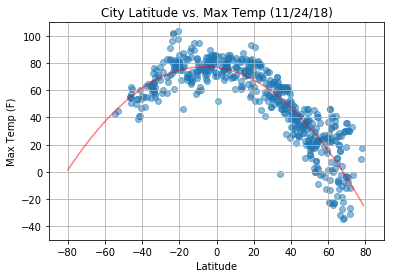

In [136]:
fig = plt.figure()
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], alpha=0.5)
poly=np.polyfit(weather_df["Latitude"], weather_df["Max Temp"], 2)
x_axis=np.arange(-80,80,1)
poly_reg=poly[0]*x_axis**2 + poly[1]*x_axis + poly[2]
plt.plot(x_axis, poly_reg, 'r', alpha=0.5)

plt.axis([-90,90,-50,110])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("City Latitude vs. Max Temp (11/24/18)")
plt.savefig("max_temp.png")
plt.show()

In [140]:
print(f'y={round(poly[0],2)}x^2 + {round(poly[1],2)}*x + {round(poly[2],2)}')

y=-0.01x^2 + -0.18*x + 76.8


#### Latitude vs. Humidity Plot

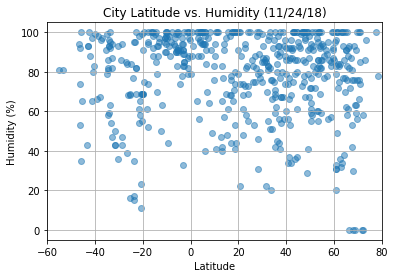

In [114]:
fig = plt.figure()
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], alpha=0.5)
plt.axis([-60,80,-5,105])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (11/24/18)")
plt.savefig("humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

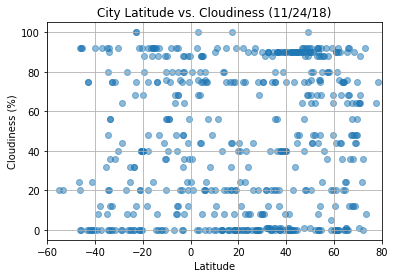

In [115]:
fig = plt.figure()
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], alpha=0.5)
plt.axis([-60,80,-5,105])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (11/24/18)")
plt.savefig("cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

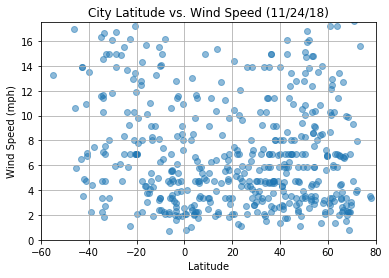

In [116]:
fig = plt.figure()
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], alpha=0.5)
plt.axis([-60,80,0,17.5])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (11/24/18)")
plt.savefig("wind_speed.png")
plt.show()